In [162]:
import numpy as np 
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(filename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)

    radio_data = get_column(data, 1)

    newspaper_data = get_column(data, 2)

    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    Y = sales_data
    return X, Y

X, Y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(Y[:5])]
print(list)

[624.1, 175.1, 300.5, 78.9]


In [163]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mean(y, y_hat)

            d1_dw1 = compute_gradient_wi(x1, y, y_hat)
            d1_dw2 = compute_gradient_wi(x2, y, y_hat)
            d1_dw3 = compute_gradient_wi(x3, y, y_hat)
            d1_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, d1_dw1, lr)
            w2 = update_weight_wi(w2, d1_dw2, lr)
            w3 = update_weight_wi(w3, d1_dw3, lr)
            b = update_weight_b(b, d1_db, lr)

            losses.append(loss)

    return w1, w2, w3, b, losses

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [164]:
def compute_loss_mean(y, y_hat):
    loss = (y - y_hat) ** 2
    return loss

l = compute_loss_mean(y=1, y_hat=0.5)
print(l)

0.25


In [165]:
def compute_gradient_wi(x1, y, y_hat):
    dl_dwi = 2 * x1 * (y_hat - y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

g_wi = compute_gradient_wi(x1=1, y=1, y_hat=0.5)
print(g_wi)

-1.0


In [166]:
g_b = compute_gradient_b(y=2, y_hat=0.5)
print(g_b)

-3.0


In [167]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [168]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


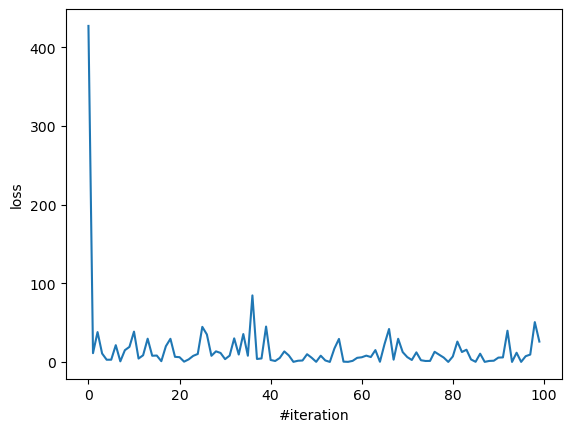

In [169]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, Y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('loss')
plt.show()

In [170]:
X, Y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, Y)
print(round(w1, 3), round(w2, 3), round(w3, 3), round(b, 3))

0.074 0.159 0.018 0.139


In [171]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, Y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, Y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales: {sales}')

predicted sales: 8.176441496327014


In [172]:
def compute_loss_mae(y, y_hat):
    loss = abs(y - y_hat)
    return loss

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [173]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters w1, w2, w3, and b (weights and bias)
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        # Initialize total loss and gradients to 0
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        # Loop over each sample
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]  # TV data
            x2 = X_data[1][i]  # Radio data
            x3 = X_data[2][i]  # Newspaper data
            y = y_data[i]      # Actual Sales data

            # Compute predicted output y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss (Mean Squared Error)
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss for this epoch
            loss_total += loss

            # Compute gradients for weights and bias
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients for all samples
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # After processing all samples, update parameters (Gradient Descent)
        w1 -= lr * dw1_total / N  # Update w1
        w2 -= lr * dw2_total / N  # Update w2
        w3 -= lr * dw3_total / N  # Update w3
        b -= lr * db_total / N    # Update bias b

        # Log the average loss for this epoch
        losses.append(loss_total / N)

    # Return the final weights, bias, and loss history
    return (w1, w2, w3, b, losses)

def compute_loss_mse(y, y_hat):
    loss = (y - y_hat) ** 2
    return loss

[302.93001193400966, 59.8468200278441, 21.303340022987832, 15.03801308892811, 13.871088917493898, 13.513951602742864, 13.289772938622157, 13.09160083792039, 12.902403819577751, 12.719343067521864, 12.54182385808933, 12.369610154322748, 12.20252697985901, 12.040413318582498, 11.883114546873772, 11.730481107636185, 11.582368173312082, 11.438635468968103, 11.29914712453532, 11.163771535425283, 11.032381228124542, 10.904852730116483, 10.78106644391602, 10.660906525075152, 10.544260764032602, 10.43102047168565, 10.321080368567323, 10.214338477514888, 10.110696019719919, 10.010057314053272, 9.912329679561719, 9.817423341036466, 9.725251337556573, 9.635729433913575, 9.548776034826693, 9.464312101860434, 9.382261072959585, 9.302548784519077, 9.225103395908947, 9.149855316376803, 9.076737134253122, 9.005683548386708, 8.93663130173995, 8.869519117076056, 8.804287634672109, 8.740879351994197, 8.679238565272906, 8.619311312919047, 8.561045320721895, 8.504389948773579, 8.449296140065357, 8.39571637

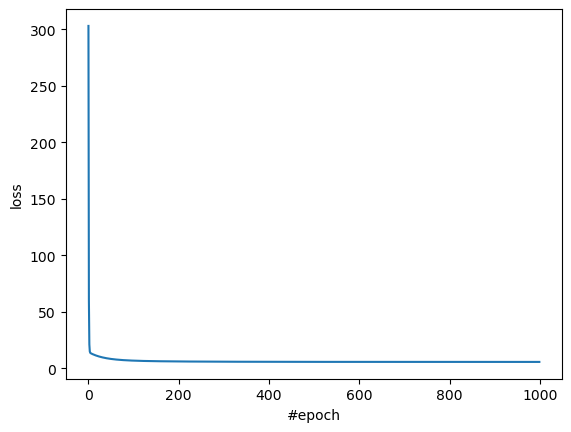

In [174]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, Y, epoch_max=1000, lr=1e-5)

print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()

In [175]:
X, Y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, Y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)

0.06710955642900909 0.15758104416823368 0.02961022394493392


In [176]:
def prepare_data(file_name):
    data = np.genfromtxt(file_name, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)

    radio_data = get_column(data, 1)

    newspaper_data = get_column(data, 2)

    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    Y = sales_data
    return X, Y

In [177]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

In [178]:
def predict(X_feature, weights):
    return sum([f*w for f, w in zip(X_feature, weights)])

def compute_loss_mean(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

def compute_gradient_wi(X_feature, y, y_hat):
    dl_dweights = [2*xi*(y_hat - y) for xi in X_feature]
    return dl_dweights


def update_weight(weights, dl_dweights, lr):
    weights = [w- lr*dw for w, dw in zip(weights, dl_dweights)]
    return weights

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49


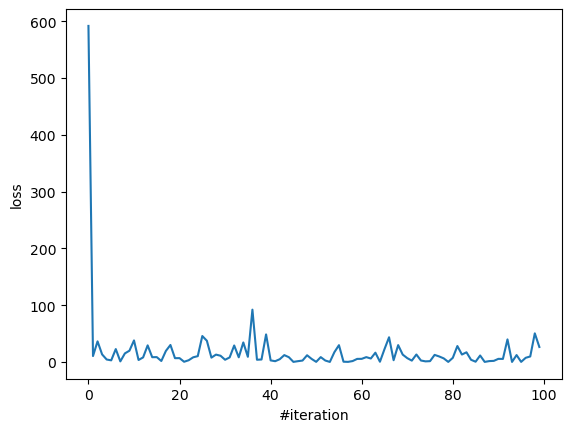

In [179]:
def implement_linear_regression(X_feature, sales_data, epoch_max=50, lr=1e-5):
    losses = []

    weights = initialize_params()

    N = len(sales_data)
    for epoch in range(epoch_max):
        print(f'epoch: {epoch}')
        for i in range(N):
            features_i = X_feature[i]
            y = sales_data[i]

            y_hat = predict(features_i, weights)

            loss = compute_loss_mean(y, y_hat)

            dl_dweights = compute_gradient_wi(features_i, y, y_hat)

            weights = update_weight(weights, dl_dweights, lr)

            losses.append(loss)

    return weights, losses

X, Y = prepare_data('advertising.csv')
weights, losses = implement_linear_regression(X, Y, epoch_max=50, lr=1e-5)
print(losses[9999])
plt.plot(losses[0:100])
plt.xlabel('#iteration')
plt.ylabel('loss')
plt.show()